# Introduction to Data Science - Lecture 6 - Loading Data, Dataframes
*COMP 5360/ MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we will learn how to read in and write files and then finally cover pandas dataframes. 

# Pandas Series Recap

In the previous lab we've introduced pandas series, a one-dimensional data structure. You will see that dataframes behave very similar to series, so we will only quickly recap the most important aspects.

Let's start by importing pandas.

In [1]:
import pandas as pd

Series have an index, and associated data. We can use the index to access the data. We've also learned that we can directly access indices and values through their implicit location. If we add the implicit location, a series looks like this: 


| Location (Implicit)| Index | Value | 
| - | - | - |
|0| Stones     |    1962
|1| Beatles    |    1960
|2| Zeppelin     |  1968
|3| Pink Floyd |    1965
|4| Pink Floyd |    2012

Here is the example in code:

In [2]:
bands_founded = pd.Series([1962, 1960, 1968, 1965, 2012],
                         name="founded",
                         index=["Stones", "Beatles", "Zeppelin", "Pink Floyd", "Pink Floyd"])
bands_founded

Stones        1962
Beatles       1960
Zeppelin      1968
Pink Floyd    1965
Pink Floyd    2012
Name: founded, dtype: int64

Notice that when we access data with multiple indices, we don't get a simple data type, as in the above cases, but instead get another series back:

In [3]:
bands_founded["Pink Floyd"]

Pink Floyd    1965
Pink Floyd    2012
Name: founded, dtype: int64

## Indexing and slicing

Indexing and slicing works largely like in normal python, but instead of just directly using the bracket notations, it is recommended to use `iloc` for indexing by position and `loc` for indexing by index. 


In [4]:
# slicing by position
bands_founded.iloc[1:3]

Beatles     1960
Zeppelin    1968
Name: founded, dtype: int64

In [5]:
# slicing by index - note that the last element is included
bands_founded.loc["Zeppelin" : "Pink Floyd"]

Zeppelin      1968
Pink Floyd    1965
Pink Floyd    2012
Name: founded, dtype: int64

Series can be indexed with arrays, which isn't possible in vanilla python:

In [6]:
bands_founded.loc[["Beatles", "Pink Floyd"]]

Beatles       1960
Pink Floyd    1965
Pink Floyd    2012
Name: founded, dtype: int64

## Masking Series

With pandas we can create boolean arrays that we can use to mask and filter a dataset. In the following expression, we'll create a new array that has "True" for every band formed after 1964 using a technique called **broadcasting**:

In [7]:
mask = bands_founded > 1964
mask

Stones        False
Beatles       False
Zeppelin       True
Pink Floyd     True
Pink Floyd     True
Name: founded, dtype: bool

We can use a boolean mask to filter a series:

In [8]:
# applying the mask to the original array
bands_founded[mask]

Zeppelin      1968
Pink Floyd    1965
Pink Floyd    2012
Name: founded, dtype: int64

The short form here would be:

In [9]:
bands_founded[bands_founded > 1965]

Zeppelin      1968
Pink Floyd    2012
Name: founded, dtype: int64

## Exploring a Series

There are various ways to explore the data in a series. We can get an overview of the statistical properties, or calculate individual properties:

In [10]:
numbers = pd.Series([1962, 1960, 1968, 1965, 2012, 2016])
numbers.mean()

1980.5

In [11]:
numbers.describe()

count       6.000000
mean     1980.500000
std        26.120873
min      1960.000000
25%      1962.750000
50%      1966.500000
75%      2001.000000
max      2016.000000
dtype: float64

## Sorting

In [12]:
sorted_numbers = numbers.sort_values(ascending=False)
sorted_numbers

5    2016
4    2012
2    1968
3    1965
0    1962
1    1960
dtype: int64

## Resetting the Index

In [13]:
sorted_numbers.reset_index(drop=True)

0    2016
1    2012
2    1968
3    1965
4    1962
5    1960
dtype: int64

## Mapping - Applying a Function

Mapping applies a function to every element in a series, which is a very powerful approach: 

In [14]:
import datetime

# Convert an integer year into a date, assuming Jan 1 as day and month.
def to_date(year):
    return datetime.date(int(year), 1, 1)
    
sorted_numbers.map(to_date)

5    2016-01-01
4    2012-01-01
2    1968-01-01
3    1965-01-01
0    1962-01-01
1    1960-01-01
dtype: object

# 1. Reading Data

Up to now, we've mainly used data that we've specified directly in code. This is, of course, not particularly scalable. We want to load data from files and eventually also connect to databases and APIs. 

Data is often stored in structured file formats, such as CSV, JSON, or XML. We'll encounter all of these file formats in this class. The simplest (and least structured) is a CSV - comma separated values - file. CSV isn't a formal file format, rather it's a table represented as a text file where the cells are separated by a delimiter. Commonly, the first row represents the header. A delimiter can be a tab character, a semicolon, a colon, etc. 

Many CSV files also have a special convention for dealing with text that could include the delimiter. The following text would be very hard to parse otherwise:
```
Artist, Album, Genre
Michael Jackson, Bad, Pop, funk, rock
``` 

Here, the album is of multiple genres which are separated by a comma. The comma, however, is also used to delimit the individual columns. To work around that, double-quotes are commonly used to indicate that all the elements contained within the quotes are not meant to be delimiters:

```
Artist, Album, Genre
Michael Jackson, Bad, "Pop, funk, rock"
``` 

Now, it is clear that `Pop, funk, rock` should belong in a single cell. 

We've prepared a dataset based on Wikipedia's [list of best-selling albums](https://en.wikipedia.org/wiki/List_of_best-selling_albums) in the file [hit_albums.csv](./hit_albums.csv). 

Here is what the first couple of lines look like:

```
Artist,Album,Released,Genre,"Certified sales (millions)",Claimed sales (millions)
Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65
AC/DC,Back in Black,1980,Hard rock,25.9,50
Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45
Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44
...
```

There are various ways of reading a CSV file. We'll first cover the basic read (and write) operations of Python, but will quickly move on to specific parsers for CSV files in Python and in pandas. 

## Basic File Operations

To read a file we first have to open it by specifying the file path, and specifying whether we want to read (r), write (w), both (r+), or append (a). 

In [15]:
albums_file = open('hit_albums.csv', 'r')

We can read a whole file at once. Notice that lines are terminated with a special character, a linefeed or newline character specified as `\n`.

In [16]:
content = albums_file.read()
content

'Artist,Album,Released,Genre,"Certified sales (millions)",Claimed sales (millions)\nMichael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65\nAC/DC,Back in Black,1980,Hard rock,25.9,50\nPink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45\nWhitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44\nMeat Loaf,Bat Out of Hell,1977,"Hard rock, progressive rock",20.6,43\nEagles,Their Greatest Hits (1971–1975),1976,"Rock, soft rock, folk rock",32.2,42\nBee Gees / Various artists,Saturday Night Fever,1977,Disco,19,40\nFleetwood Mac,Rumours,1977,Soft rock,27.9,40\nShania Twain,Come On Over,1997,"Country, pop",29.6,39\nLed Zeppelin,Led Zeppelin IV,1971,"Hard rock, heavy metal",29,37\nMichael Jackson,Bad,1987,"Pop, funk, rock",20.3,34\nAlanis Morissette,Jagged Little Pill,1995,Alternative rock,24.8,33\nCeline Dion,Falling into You,1996,"Pop, Soft rock",20.2,32\nThe Beatles,Sgt. Pepper\'s Lonely Hearts Club Band,1967,Rock,13.1,32\nEagles,Hotel California

If we print this instead, `\n` is translated into a newline: 

In [17]:
print(content)

Artist,Album,Released,Genre,"Certified sales (millions)",Claimed sales (millions)
Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65
AC/DC,Back in Black,1980,Hard rock,25.9,50
Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45
Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44
Meat Loaf,Bat Out of Hell,1977,"Hard rock, progressive rock",20.6,43
Eagles,Their Greatest Hits (1971–1975),1976,"Rock, soft rock, folk rock",32.2,42
Bee Gees / Various artists,Saturday Night Fever,1977,Disco,19,40
Fleetwood Mac,Rumours,1977,Soft rock,27.9,40
Shania Twain,Come On Over,1997,"Country, pop",29.6,39
Led Zeppelin,Led Zeppelin IV,1971,"Hard rock, heavy metal",29,37
Michael Jackson,Bad,1987,"Pop, funk, rock",20.3,34
Alanis Morissette,Jagged Little Pill,1995,Alternative rock,24.8,33
Celine Dion,Falling into You,1996,"Pop, Soft rock",20.2,32
The Beatles,Sgt. Pepper's Lonely Hearts Club Band,1967,Rock,13.1,32
Eagles,Hotel California,1976,"Rock, soft

After reading a file, we have to manually close it again to release the OS resources:

In [18]:
albums_file.close()

Alternatively, we can read each line separately:

In [19]:
albums_file = open('hit_albums.csv', 'r')
line1 = albums_file.readline();
print(line1)

Artist,Album,Released,Genre,"Certified sales (millions)",Claimed sales (millions)



We could now [`split()`](https://docs.python.org/3/library/stdtypes.html#str.split) the string based on the comma, to create a simple CSV parser:

In [20]:
line1.split(",")

['Artist',
 'Album',
 'Released',
 'Genre',
 '"Certified sales (millions)"',
 'Claimed sales (millions)\n']

We can loop over the file and read the data into an array:

In [21]:
data = []
for line in albums_file:
    data.append(line.split(","))
    
# let's not forget to close the file:
albums_file.close()
data

[['Michael Jackson',
  'Thriller',
  '1982',
  '"Pop',
  ' rock',
  ' R&B"',
  '45.4',
  '65\n'],
 ['AC/DC', 'Back in Black', '1980', 'Hard rock', '25.9', '50\n'],
 ['Pink Floyd',
  'The Dark Side of the Moon',
  '1973',
  'Progressive rock',
  '22.7',
  '45\n'],
 ['Whitney Houston / Various artists',
  'The Bodyguard',
  '1992',
  '"Soundtrack/R&B',
  ' soul',
  ' pop"',
  '27.4',
  '44\n'],
 ['Meat Loaf',
  'Bat Out of Hell',
  '1977',
  '"Hard rock',
  ' progressive rock"',
  '20.6',
  '43\n'],
 ['Eagles',
  'Their Greatest Hits (1971–1975)',
  '1976',
  '"Rock',
  ' soft rock',
  ' folk rock"',
  '32.2',
  '42\n'],
 ['Bee Gees / Various artists',
  'Saturday Night Fever',
  '1977',
  'Disco',
  '19',
  '40\n'],
 ['Fleetwood Mac', 'Rumours', '1977', 'Soft rock', '27.9', '40\n'],
 ['Shania Twain', 'Come On Over', '1997', '"Country', ' pop"', '29.6', '39\n'],
 ['Led Zeppelin',
  'Led Zeppelin IV',
  '1971',
  '"Hard rock',
  ' heavy metal"',
  '29',
  '37\n'],
 ['Michael Jackson', 'Ba

We can now read individual cells or rows:

In [22]:
data[0][1]

'Thriller'

In [23]:
data[0]

['Michael Jackson',
 'Thriller',
 '1982',
 '"Pop',
 ' rock',
 ' R&B"',
 '45.4',
 '65\n']

As we can see, this didn't take proper care of our double-quote escape of "Pop, rock, R&B". Also, numbers are still treated as strings and the newline character is also appended to the last cell. 

We could certainly improve our parser to handle these issues, but fortunately, there are existing methods to parse CSV files that make this easier.

### Writing

We can write by opening a file using the `w` flag. Here we also use the [`with`](https://docs.python.org/3/reference/compound_stmts.html#the-with-statement) keyword, which also takes care of closing the file for us, even if things go wrong (see [this blog post](https://jeffknupp.com/blog/2016/03/07/python-with-context-managers/) for details):

In [24]:
with open('my_file.txt', 'w') as new_file:
    new_file.write("Hello World\nAre you still spinning?\n")

We can now check out this file by opening [my_file.txt](my_file.txt). Notice that the file is only guaranteed to be written if you actually close it (which, here, is take care of by the context manager invoked by the with statement). 

You can find more examples on basic file operations in the [Python Documentation](https://docs.python.org/3/tutorial/inputoutput.html).

## Exercise 1: Reading and Writing Data

The file [grades.csv](grades.csv) is a file with student names and letter grades:

```
Alice; A
Bob; B
Robert; A
Richard; C
```

Read the file into an array. Add a GPA to the student's row (A=4,B=3,C=2,D=1). 

Hint: the function [strip()](https://docs.python.org/3/library/stdtypes.html#str.strip) removes trailing whitespace from a string.

Write that file into a new file `grades_gpa.csv`

In [25]:
gpas = {"A":4, "B":3, "C":2, "D":1}

data = []
# continue here

## Reading a CSV file with the CSV Library

We can use the CSV library to help with reading the data. It takes a `delimiter` and a `quotechar`, the latter is useful for our double quotes:

In [26]:
# import the csv library
import csv

# initialize the top-level array
data_values = []

# open the file and append rows as arrays to the data_values
with open('hit_albums.csv') as csvfile:
    # note that we can interchangably use ' and " in general
    # for the quotechar, however we use ' so that we can use " without escaping
    filereader = csv.reader(csvfile, delimiter=',', quotechar='"')
    # the row here is an array
    for row in filereader:
        print("Row: " + str(row))
        data_values.append(row)

# Store the header in a separate array
header = data_values.pop(0)
   
print()    
print(header)
print()
print(data_values)

Row: ['Artist', 'Album', 'Released', 'Genre', 'Certified sales (millions)', 'Claimed sales (millions)']
Row: ['Michael Jackson', 'Thriller', '1982', 'Pop, rock, R&B', '45.4', '65']
Row: ['AC/DC', 'Back in Black', '1980', 'Hard rock', '25.9', '50']
Row: ['Pink Floyd', 'The Dark Side of the Moon', '1973', 'Progressive rock', '22.7', '45']
Row: ['Whitney Houston / Various artists', 'The Bodyguard', '1992', 'Soundtrack/R&B, soul, pop', '27.4', '44']
Row: ['Meat Loaf', 'Bat Out of Hell', '1977', 'Hard rock, progressive rock', '20.6', '43']
Row: ['Eagles', 'Their Greatest Hits (1971–1975)', '1976', 'Rock, soft rock, folk rock', '32.2', '42']
Row: ['Bee Gees / Various artists', 'Saturday Night Fever', '1977', 'Disco', '19', '40']
Row: ['Fleetwood Mac', 'Rumours', '1977', 'Soft rock', '27.9', '40']
Row: ['Shania Twain', 'Come On Over', '1997', 'Country, pop', '29.6', '39']
Row: ['Led Zeppelin', 'Led Zeppelin IV', '1971', 'Hard rock, heavy metal', '29', '37']
Row: ['Michael Jackson', 'Bad', '19

To do computation on the numerical dimensions of this table, we need to also convert the strings to numbers. Here, the last column, `Claimed sales (millions)` doesn't have values for each row. In that case, the conversion throws a `ValueError` exception. [Exceptions](https://docs.python.org/3/reference/compound_stmts.html#try) are error states that can be raised and caught:

In [27]:
for row in data_values: 
    row[2] = int(row[2])
    row[4] = float(row[4])
    # need to try and catch the exception because the column contains NaN values
    try:
        row[5] = float(row[5])
    except ValueError: 
        row[5] = None
    
data_values

[['Michael Jackson', 'Thriller', 1982, 'Pop, rock, R&B', 45.4, 65.0],
 ['AC/DC', 'Back in Black', 1980, 'Hard rock', 25.9, 50.0],
 ['Pink Floyd',
  'The Dark Side of the Moon',
  1973,
  'Progressive rock',
  22.7,
  45.0],
 ['Whitney Houston / Various artists',
  'The Bodyguard',
  1992,
  'Soundtrack/R&B, soul, pop',
  27.4,
  44.0],
 ['Meat Loaf',
  'Bat Out of Hell',
  1977,
  'Hard rock, progressive rock',
  20.6,
  43.0],
 ['Eagles',
  'Their Greatest Hits (1971–1975)',
  1976,
  'Rock, soft rock, folk rock',
  32.2,
  42.0],
 ['Bee Gees / Various artists',
  'Saturday Night Fever',
  1977,
  'Disco',
  19.0,
  40.0],
 ['Fleetwood Mac', 'Rumours', 1977, 'Soft rock', 27.9, 40.0],
 ['Shania Twain', 'Come On Over', 1997, 'Country, pop', 29.6, 39.0],
 ['Led Zeppelin',
  'Led Zeppelin IV',
  1971,
  'Hard rock, heavy metal',
  29.0,
  37.0],
 ['Michael Jackson', 'Bad', 1987, 'Pop, funk, rock', 20.3, 34.0],
 ['Alanis Morissette',
  'Jagged Little Pill',
  1995,
  'Alternative rock',
  

So, here we have matrix that we could work with. In reality, we probably would want to structure the data a little differently - instead of treating each row as an array, we'd want to treat each dimension (column) as an array, as this makes the column homogeneous and it makes it easy to calculate means, etc. 

## Reading CSV with Pandas

Now, let's take a look at what it takes to read this file using pandas.

In [28]:
hit_albums = pd.read_csv("hit_albums.csv")
hit_albums

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65.0
1,AC/DC,Back in Black,1980,Hard rock,25.9,50.0
2,Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45.0
3,Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44.0
4,Meat Loaf,Bat Out of Hell,1977,"Hard rock, progressive rock",20.6,43.0
5,Eagles,Their Greatest Hits (1971–1975),1976,"Rock, soft rock, folk rock",32.2,42.0
6,Bee Gees / Various artists,Saturday Night Fever,1977,Disco,19.0,40.0
7,Fleetwood Mac,Rumours,1977,Soft rock,27.9,40.0
8,Shania Twain,Come On Over,1997,"Country, pop",29.6,39.0
9,Led Zeppelin,Led Zeppelin IV,1971,"Hard rock, heavy metal",29.0,37.0


Well, that was different! 

Pandas provides the insanely powerful ['read_csv()'](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) method - also see [this](http://pandas.pydata.org/pandas-docs/stable/io.html) for more info on all I/O operations in pandas, including writing CSV files. 

You can pass a lot of arguments to the method, such as delimiter, quote-chars, etc., but for our case the default parameters just worked. 

We've also just created our first data frame! Let's look at data frames in detail next. 

# 2. Data Frames

A data frame is a column-oriented data structure where each column is a pandas series.

Here is [a printable cheat sheet for pandas](https://drive.google.com/drive/u/0/folders/0ByIrJAE4KMTtaGhRcXkxNHhmY2M).

We've already loaded a data frame from file, but for completeness sake, let's create one in code: 

In [29]:
bandInfo = pd.DataFrame({
        "Name":["Led Zeppelin", "The Beatles", "Rolling Stones", "Radiohead"],
        "No Members":[4, 4, 4, 5],
        "No Albums":[9, 12, 29 ,9]
    })
bandInfo


,Name,No Members,No Albums
0,Led Zeppelin,4,9
1,The Beatles,4,12
2,Rolling Stones,4,29
3,Radiohead,5,9


Thid dataframe was initialized with a dictonary of column headers as keys and column data as values.

Just as a series, a data frame has an index, which corresponds to the first column here. In this case the index was automatically generated, but as for the series, we could use explicit values for the index. 

We can access columns in a data frame, which returns a series:

In [30]:
bandInfo["Name"]

0      Led Zeppelin
1       The Beatles
2    Rolling Stones
3         Radiohead
Name: Name, dtype: object

In [31]:
type(bandInfo["Name"])

pandas.core.series.Series

And obviously, we can do all the things we've learned about to this column/series. 

The previous example used columns to create the data frame. We can also create a data frame from rows. This doesn't make a ton of sense in this example, but you could find the data coming out of a data source, like our CSV file, in that order. 

In [32]:
bandInfo2 = pd.DataFrame([
        {"Name":"Led Zeppelin", "No Albums":9, "No Members":4},
        {"Name":"The Beatles", "No Albums":12, "No Members":4},
        {"Name":"Rolling Stones", "No Albums":29, "No Members":4},
        {"Name":"Radiohead", "No Albums":9, "No Members":5},
    ])
bandInfo2

,Name,No Albums,No Members
0,Led Zeppelin,9,4
1,The Beatles,12,4
2,Rolling Stones,29,4
3,Radiohead,9,5


While a series has only one axis, a dataframe has two, one for the rows (the index or '0' axis), one for the columns (the column or '1' axis). We can check out these axes:

In [33]:
bandInfo.axes

[RangeIndex(start=0, stop=4, step=1),
 Index(['Name', 'No Members', 'No Albums'], dtype='object')]

We can access these axes directly:

In [34]:
# The row axis
bandInfo.axes[0]

RangeIndex(start=0, stop=4, step=1)

In [35]:
# The columns axis
bandInfo.axes[1]

Index(['Name', 'No Members', 'No Albums'], dtype='object')

## Exploring Data Frames

You might have noticed that data frames are rendered in nice HTML tables within Jupyter Notebooks. For small data frames, just showing all the data makes sense, but for larger datasets, like our `hit_albums` dataset, plotting 70+ rows can be annoying, and for datasets with hundreds or thousands of rows it can be prohibitive. By default, a data frame only prints a limited number of elements (notice the `...` in row 30 of the output of `hit_albums` above - only the first 30 and last 30 are printed. 

When working with data, e.g., when transforming or loading a dataset, it is important to see the raw data, for example, to check if a transformation was done correctly. Often, however, it's sufficient to see a part of the data, e.g., the first couple of rows and/or the last couple of rows. We can do this with the `head()` and `tail()` function:


In [36]:
# head shows the first 5 rows of a datset
hit_albums.head()

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65.0
1,AC/DC,Back in Black,1980,Hard rock,25.9,50.0
2,Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45.0
3,Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44.0
4,Meat Loaf,Bat Out of Hell,1977,"Hard rock, progressive rock",20.6,43.0


In [37]:
# we can specify how much to show
hit_albums.head(8)

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65.0
1,AC/DC,Back in Black,1980,Hard rock,25.9,50.0
2,Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45.0
3,Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44.0
4,Meat Loaf,Bat Out of Hell,1977,"Hard rock, progressive rock",20.6,43.0
5,Eagles,Their Greatest Hits (1971–1975),1976,"Rock, soft rock, folk rock",32.2,42.0
6,Bee Gees / Various artists,Saturday Night Fever,1977,Disco,19.0,40.0
7,Fleetwood Mac,Rumours,1977,Soft rock,27.9,40.0


In [38]:
# tail shows the last five rows in a datasaet
hit_albums.tail()

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
72,Tracy Chapman,Tracy Chapman,1988,Folk rock,20.0,NaN
73,Usher,Confessions,2004,R&B,20.0,NaN
74,Various artists,Flashdance: Original Soundtrack from the Motio...,1983,Soundtrack,20.0,NaN
75,Whitney Houston,Whitney,1987,"Pop, R&B",20.0,NaN
76,Shakira,Laundry Service,2001,"Pop, Rock",20.0,NaN


We can check out the dimensions of the data frame:

In [39]:
hit_albums.shape

(77, 6)

Here we learn that our dataset has 77 rows and 6 columns.

We can also get more info about the dataset using the info method, which is especially helpful to see the data types of the columns:

In [40]:
hit_albums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
Artist                        77 non-null object
Album                         77 non-null object
Released                      77 non-null int64
Genre                         77 non-null object
Certified sales (millions)    77 non-null float64
Claimed sales (millions)      31 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ KB


As for series, we can get a rough description of the numerical values of the dataset.

In [41]:
hit_albums.describe()

,Released,Certified sales (millions),Claimed sales (millions)
count,77.000000,77.000000,31.000000
mean,1988.662338,22.409091,35.354839
std,9.949359,4.521620,7.855140
min,1967.000000,13.100000,30.000000
25%,1983.000000,20.000000,30.000000
50%,1987.000000,20.600000,32.000000
75%,1996.000000,25.000000,39.500000
max,2015.000000,45.400000,65.000000


We don't see any descriptions of the columns of non-numerical type. We can, however, get a summary by directly accessing a column:

In [42]:
hit_albums["Artist"].describe()

count                  77
unique                 56
top       Michael Jackson
freq                    5
Name: Artist, dtype: object

Here we can see that Michael Jackson is the top artist in this list, with five albums. Are there other artists with multiple albums in the list? We can answer that question with the value_counts() method:

In [43]:
hit_albums["Artist"].value_counts()

Michael Jackson                      5
The Beatles                          3
Various artists                      3
Shania Twain                         3
Madonna                              3
Adele                                2
Pink Floyd                           2
Celine Dion                          2
Whitney Houston                      2
Bon Jovi                             2
Backstreet Boys                      2
Eagles                               2
Mariah Carey                         2
Britney Spears                       2
Shakira                              1
Cyndi Lauper                         1
Supertramp                           1
Def Leppard                          1
Prince & the Revolution              1
Usher                                1
Guns N' Roses                        1
George Michael                       1
Simon & Garfunkel                    1
Carole King                          1
Alanis Morissette                    1
Oasis                    

We can look at whether the numerical columns in our data frame are correlated using the [`corr()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) method. By default, this calculates a Pearson correlation between the column, excluding NaN values. Not surprisingly, we see a rather strong correlation (0.81) between certified and claimed sales. 

In [44]:
hit_albums.corr()

,Released,Certified sales (millions),Claimed sales (millions)
Released,1.000000,-0.052109,-0.320593
Certified sales (millions),-0.052109,1.000000,0.810280
Claimed sales (millions),-0.320593,0.810280,1.000000


We can also do transpose a dataframe:

In [45]:
hit_albums.T

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
Artist,Michael Jackson,AC/DC,Pink Floyd,Whitney Houston / Various artists,Meat Loaf,Eagles,Bee Gees / Various artists,Fleetwood Mac,Shania Twain,Led Zeppelin,...,Prince & the Revolution,Shania Twain,Shania Twain,Supertramp,Tina Turner,Tracy Chapman,Usher,Various artists,Whitney Houston,Shakira
Album,Thriller,Back in Black,The Dark Side of the Moon,The Bodyguard,Bat Out of Hell,Their Greatest Hits (1971–1975),Saturday Night Fever,Rumours,Come On Over,Led Zeppelin IV,...,Purple Rain,The Woman in Me,Up!,Breakfast in America,Private Dancer,Tracy Chapman,Confessions,Flashdance: Original Soundtrack from the Motio...,Whitney,Laundry Service
Released,1982,1980,1973,1992,1977,1976,1977,1977,1997,1971,...,1984,1995,2002,1979,1984,1988,2004,1983,1987,2001
Genre,"Pop, rock, R&B",Hard rock,Progressive rock,"Soundtrack/R&B, soul, pop","Hard rock, progressive rock","Rock, soft rock, folk rock",Disco,Soft rock,"Country, pop","Hard rock, heavy metal",...,"Pop, rock, R&B","Country, pop","Country, pop, world music","Progressive rock, art rock","Pop, rock, R&B",Folk rock,R&B,Soundtrack,"Pop, R&B","Pop, Rock"
Certified sales (millions),45.4,25.9,22.7,27.4,20.6,32.2,19,27.9,29.6,29,...,20,20,20,20,20,20,20,20,20,20
Claimed sales (millions),65,50,45,44,43,42,40,40,39,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Slicing Data Frames

A common task is to create subsets of a dataframe. 

We can explicitly define the the columns we want by their lables:

In [46]:
# we only need to keep the columns we care about
hit_albums = hit_albums[["Artist","Certified sales (millions)", "Claimed sales (millions)"]]
hit_albums.head()

,Artist,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,45.4,65.0
1,AC/DC,25.9,50.0
2,Pink Floyd,22.7,45.0
3,Whitney Houston / Various artists,27.4,44.0
4,Meat Loaf,20.6,43.0


We can also set a column to be the index:

In [47]:
hit_albums_reindexed = hit_albums.set_index("Artist")
hit_albums_reindexed.head()

,Certified sales (millions),Claimed sales (millions)
Artist,,
Michael Jackson,45.4,65.0
AC/DC,25.9,50.0
Pink Floyd,22.7,45.0
Whitney Houston / Various artists,27.4,44.0
Meat Loaf,20.6,43.0


Using these access methods we can also update the order: 

In [48]:
hit_albums[["Certified sales (millions)", "Artist"]].head()

,Certified sales (millions),Artist
0,45.4,Michael Jackson
1,25.9,AC/DC
2,22.7,Pink Floyd
3,27.4,Whitney Houston / Various artists
4,20.6,Meat Loaf


We can retrieve rows using the `loc` indexer by name. Note that this doesn't work if we use duplicates as indexers. 

In [49]:
hit_albums_reindexed.loc["Green Day":"Supertramp"]

,Certified sales (millions),Claimed sales (millions)
Artist,,
Green Day,20.0,NaN
Lionel Richie,20.0,NaN
Michael Jackson,20.0,NaN
Michael Jackson,20.0,NaN
Prince & the Revolution,20.0,NaN
Shania Twain,20.0,NaN
Shania Twain,20.0,NaN
Supertramp,20.0,NaN


This can also be combined with slicing columns: 

In [50]:
hit_albums_reindexed.loc["Green Day":"Supertramp", ["Certified sales (millions)"]]

,Certified sales (millions)
Artist,
Green Day,20.0
Lionel Richie,20.0
Michael Jackson,20.0
Michael Jackson,20.0
Prince & the Revolution,20.0
Shania Twain,20.0
Shania Twain,20.0
Supertramp,20.0


Here is the same thing using `iloc`, i.e., index based slicing:

In [51]:
hit_albums_reindexed.iloc[3:5, [0]]

,Certified sales (millions)
Artist,
Whitney Houston / Various artists,27.4
Meat Loaf,20.6


### Grouping Data Frames

Very often, we want to aggregate data. Given the hit-albums dataset, for example, we might want to ask how many albums each artist in that list has sold in total. We can do these aggregations using the group-by method. 



We can specify a column to group by, for example, "Artist". We can look at the groups created:

In [52]:
grouped = hit_albums.groupby("Artist")
grouped.groups

{'ABBA': Int64Index([31], dtype='int64'),
 'AC/DC': Int64Index([1], dtype='int64'),
 'Ace of Base': Int64Index([50], dtype='int64'),
 'Adele': Int64Index([20, 56], dtype='int64'),
 'Alanis Morissette': Int64Index([11], dtype='int64'),
 'Avril Lavigne': Int64Index([57], dtype='int64'),
 'Backstreet Boys': Int64Index([48, 49], dtype='int64'),
 'Bee Gees / Various artists': Int64Index([6], dtype='int64'),
 'Bob Marley & The Wailers': Int64Index([37], dtype='int64'),
 'Bon Jovi': Int64Index([32, 54], dtype='int64'),
 'Boston': Int64Index([58], dtype='int64'),
 'Britney Spears': Int64Index([35, 59], dtype='int64'),
 'Bruce Springsteen': Int64Index([22], dtype='int64'),
 'Carole King': Int64Index([38], dtype='int64'),
 'Celine Dion': Int64Index([12, 18], dtype='int64'),
 'Cyndi Lauper': Int64Index([52], dtype='int64'),
 'Def Leppard': Int64Index([61], dtype='int64'),
 'Dire Straits': Int64Index([23], dtype='int64'),
 'Eagles': Int64Index([5, 14], dtype='int64'),
 'Eminem': Int64Index([55], d

Note that the keys map to a set of indices. For example, Michael Jackson's albums are found at indices [0, 10, 16, 65, 66].

Once we have created these groups, we can specify what to do with it. A very generic solution is the `agg()` function, which we can pass a function to do things with the data:

In [53]:
#here we pass the sum function, which calcualtes the sum of a list, to the group
grouped.agg(sum).head()

,Certified sales (millions),Claimed sales (millions)
Artist,,
ABBA,29.0,0.0
AC/DC,25.9,50.0
Ace of Base,23.0,0.0
Adele,42.3,30.0
Alanis Morissette,24.8,33.0


We can see here that we've summed up all columns. However, note that NaN plus some number is still NaN. So let's work with a slice of the dataframe instead. 


Here is an aggregation with an in-line function definition where we still create the sum, but also multiply by a million. We use a [lambda expression](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) to define the function:

In [54]:
grouped.agg(lambda rows : sum([cell * 1000000 for cell in rows])).head()

,Certified sales (millions),Claimed sales (millions)
Artist,,
ABBA,29000000.0,NaN
AC/DC,25900000.0,50000000.0
Ace of Base,23000000.0,NaN
Adele,42300000.0,NaN
Alanis Morissette,24800000.0,33000000.0


Lambda expressions are just a different way of defining a function in line, without assigning it a name. They only work for a single statement. 

Here is a simple lambda expression, which returns a function, which we assign to the variable add:

In [55]:
add = lambda a, b : a+b

In [56]:
add(2, 3)

5

Pandas also has a couple of built in functions in place of the generic agg method. For example, we can just call `sum()`:

In [57]:
# first we create a new slice of the dataset
artists_sales = hit_albums[["Artist","Certified sales (millions)"]]
# then we group by Artist, then sum the values up
aggregated = artists_sales.groupby("Artist").sum()
aggregated.head()

,Certified sales (millions)
Artist,
ABBA,29.0
AC/DC,25.9
Ace of Base,23.0
Adele,42.3
Alanis Morissette,24.8


Now we sort them, and have a nice result:

In [58]:
aggregated.sort_values("Certified sales (millions)", ascending=False).head()

,Certified sales (millions)
Artist,
Michael Jackson,123.3
Shania Twain,69.6
Madonna,69.4
Various artists,65.9
Eagles,53.7


### Exercise 2: Data Frames

* Calculate the mean certified sales for all albums.
* Create a new dataframe that only contains albums with more than 20 million certified sales.
* Create a new dataframe based on the hit_albums dataset that only contains the artists that have at least two albums in the list.
* Create a new dataframe that contains the aggregates sum of all certified sales for each year.

## Buit-in Plotting

Dataframes have built-in plotting capabilities based on the [matplotlib](http://matplotlib.org/) library. We'll see more about plotting later - here we'll only use the buit-in capabilities of pandas. 

First, we have to import the matplotlib library, and tell Jupyter to display the images directly here:

In [59]:
import matplotlib.pyplot as plt
# This next line tells jupyter to render the images inline
%matplotlib inline

Then we can simply call the plot attribute:

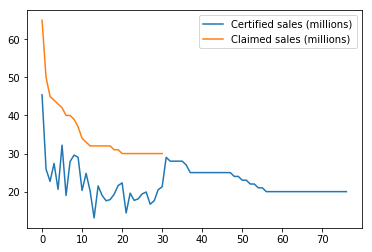

In [60]:
hit_albums.plot()

The default is a line chart. This doesn't make much sense, since it's mixing years with sales. We're better of plotting only the two different sales figures:

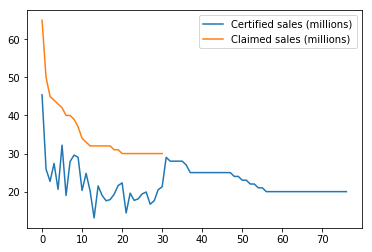

In [61]:
hit_albums[["Certified sales (millions)", "Claimed sales (millions)"]].plot()

We can also use bar-charts instead of line-charts:

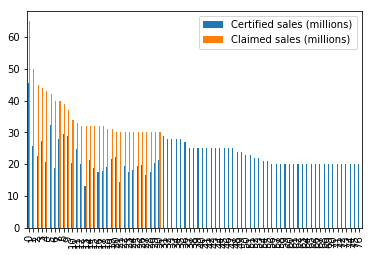

In [62]:
hit_albums[["Certified sales (millions)", "Claimed sales (millions)"]].plot(kind="bar")

A better way to compare certified and claimed sales is a scatterplot:

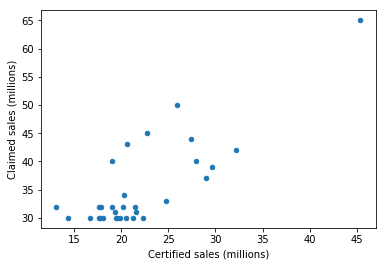

In [63]:
hit_albums.plot.scatter(x="Certified sales (millions)", y="Claimed sales (millions)")

We'll do more sophisticated plotting next time! 